In [1]:
import os
import sys

# Set the project root directory
project_root = os.path.abspath("..")  # Adjust this based on the notebook's location
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from calibration import WeightedConformalCalibration, DistanceConformalCalibration
import numpy as np
from calibration import load_calibration

weighted_conditional = WeightedConformalCalibration()
distance_conditional = DistanceConformalCalibration()


Producing conformal plot: data/out/medlfqav2_similarity_a=1.00_weighted_removal_fig.png


100%|██████████| 8/8 [07:07<00:00, 53.41s/it]


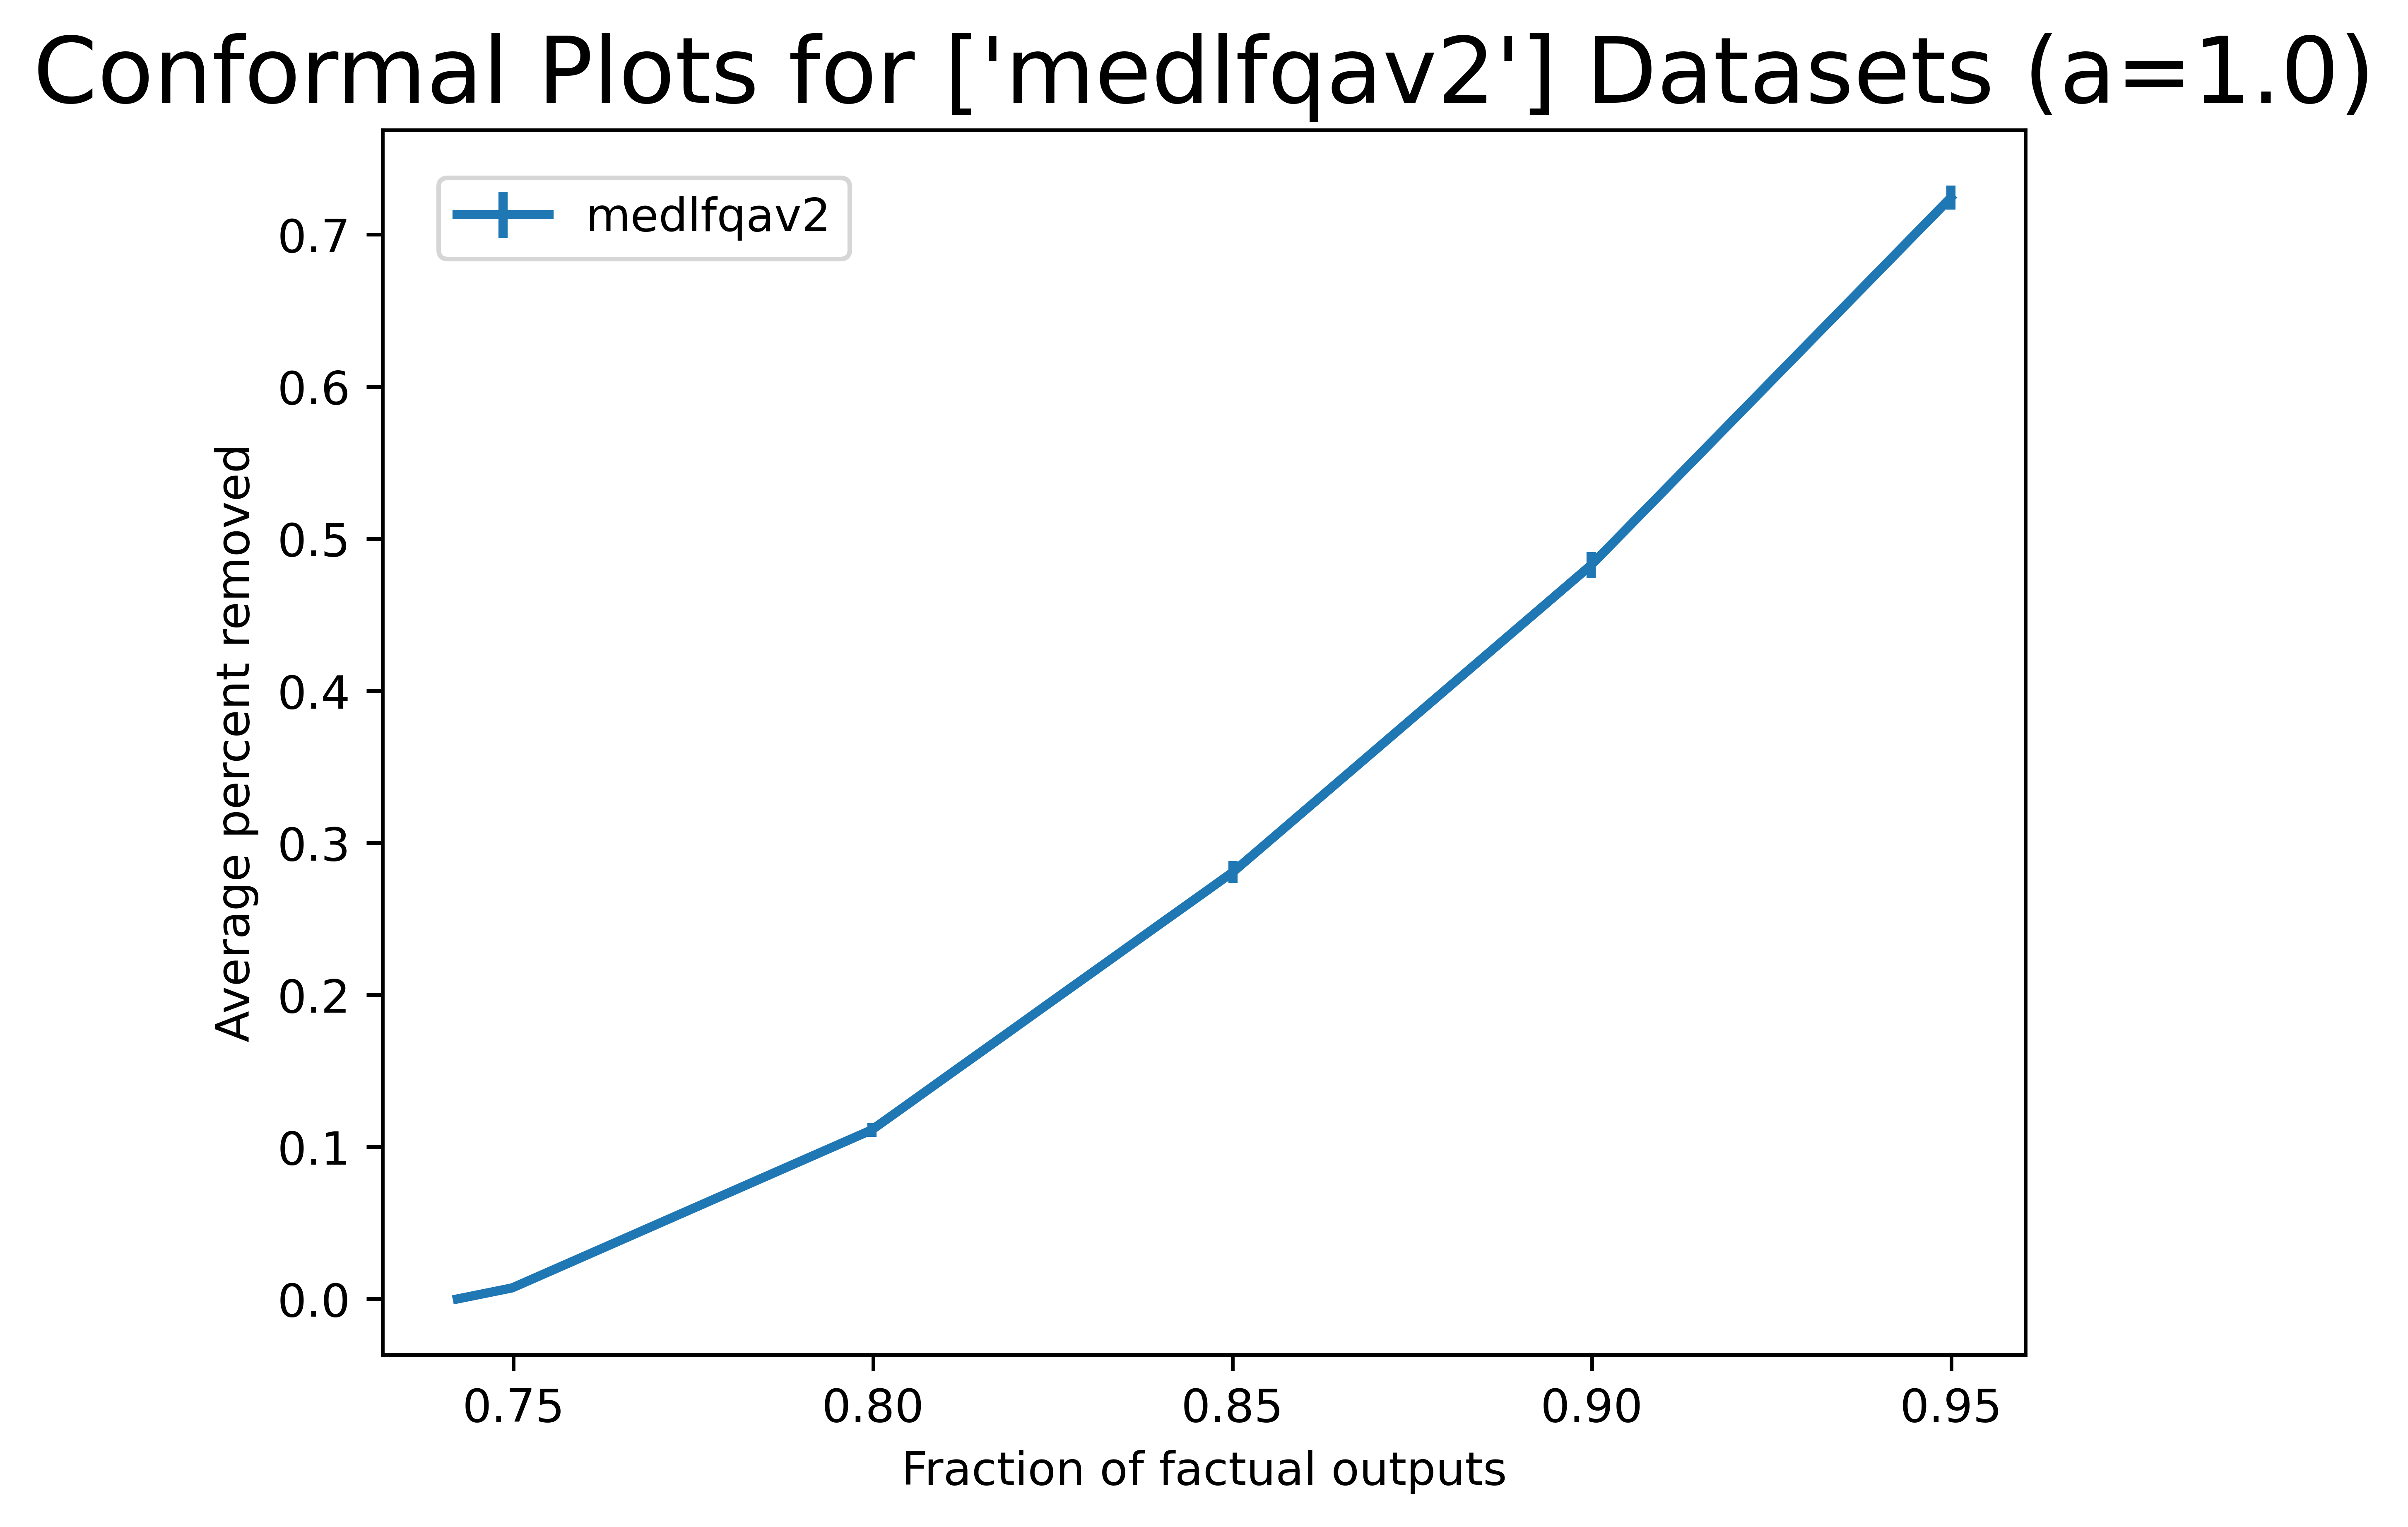

In [8]:

a=1.0
dataset_prefixs = ['medlfqav2'] #option: medication_qa, healthsearch_qa, kqa_golden, kqa_silver_wogold, live_qa， medlfqav2
method = 'similarity'
alphas = np.arange(0.05, 0.45, 0.05)
datasets = {}
for dataset_prefix in dataset_prefixs:
    data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
    datasets[dataset_prefix] = data

dsprefixs = "_".join(dataset_prefixs)
fig_filename = f"data/out/{dsprefixs}_{method}_a={a:.2f}_weighted_removal_fig.png"
csv_filename = f"data/out/{dsprefixs}_{method}_a={a:.2f}_weighted_removal.csv"
weighted_conditional.calibrate_removal(
    dataset_prefixs, method, datasets, alphas, a, fig_filename, csv_filename
)

Producing calibration plot: data/out/medlfqav2_similarity_a=1.00_calibration_weighted_conditional_fig.png


100%|██████████| 8/8 [11:46:09<00:00, 5296.18s/it]  


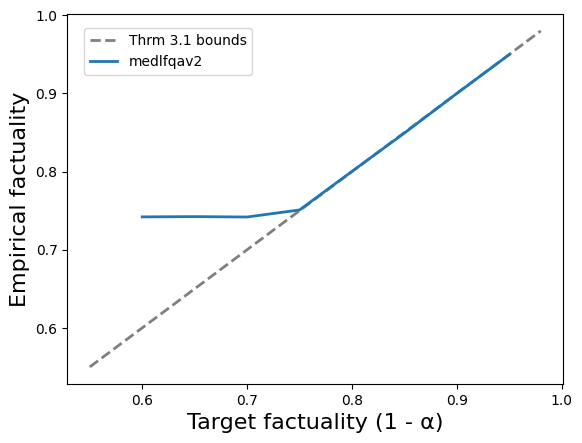

In [3]:

a=1.0
alphas = np.arange(0.05, 0.45, 0.05)
dataset_prefix = 'medlfqav2'
confidence_method = 'similarity'
data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
fig_filename = f"data/out/{dataset_prefix}_{confidence_method}_a={a:.2f}_calibration_weighted_conditional_fig.png"
csv_filename = f"data/out/{dataset_prefix}_{confidence_method}_a={a:.2f}_calibration_weighted_conditional.csv"
weighted_conditional.calibrate_factual(
    dataset_prefix, confidence_method, data, alphas, a, fig_filename, csv_filename
)

Producing conformal plot: data/out/medlfqav2_similarity_a=1.00_weighted_removal_fig.png


100%|██████████| 8/8 [02:53<00:00, 21.72s/it]


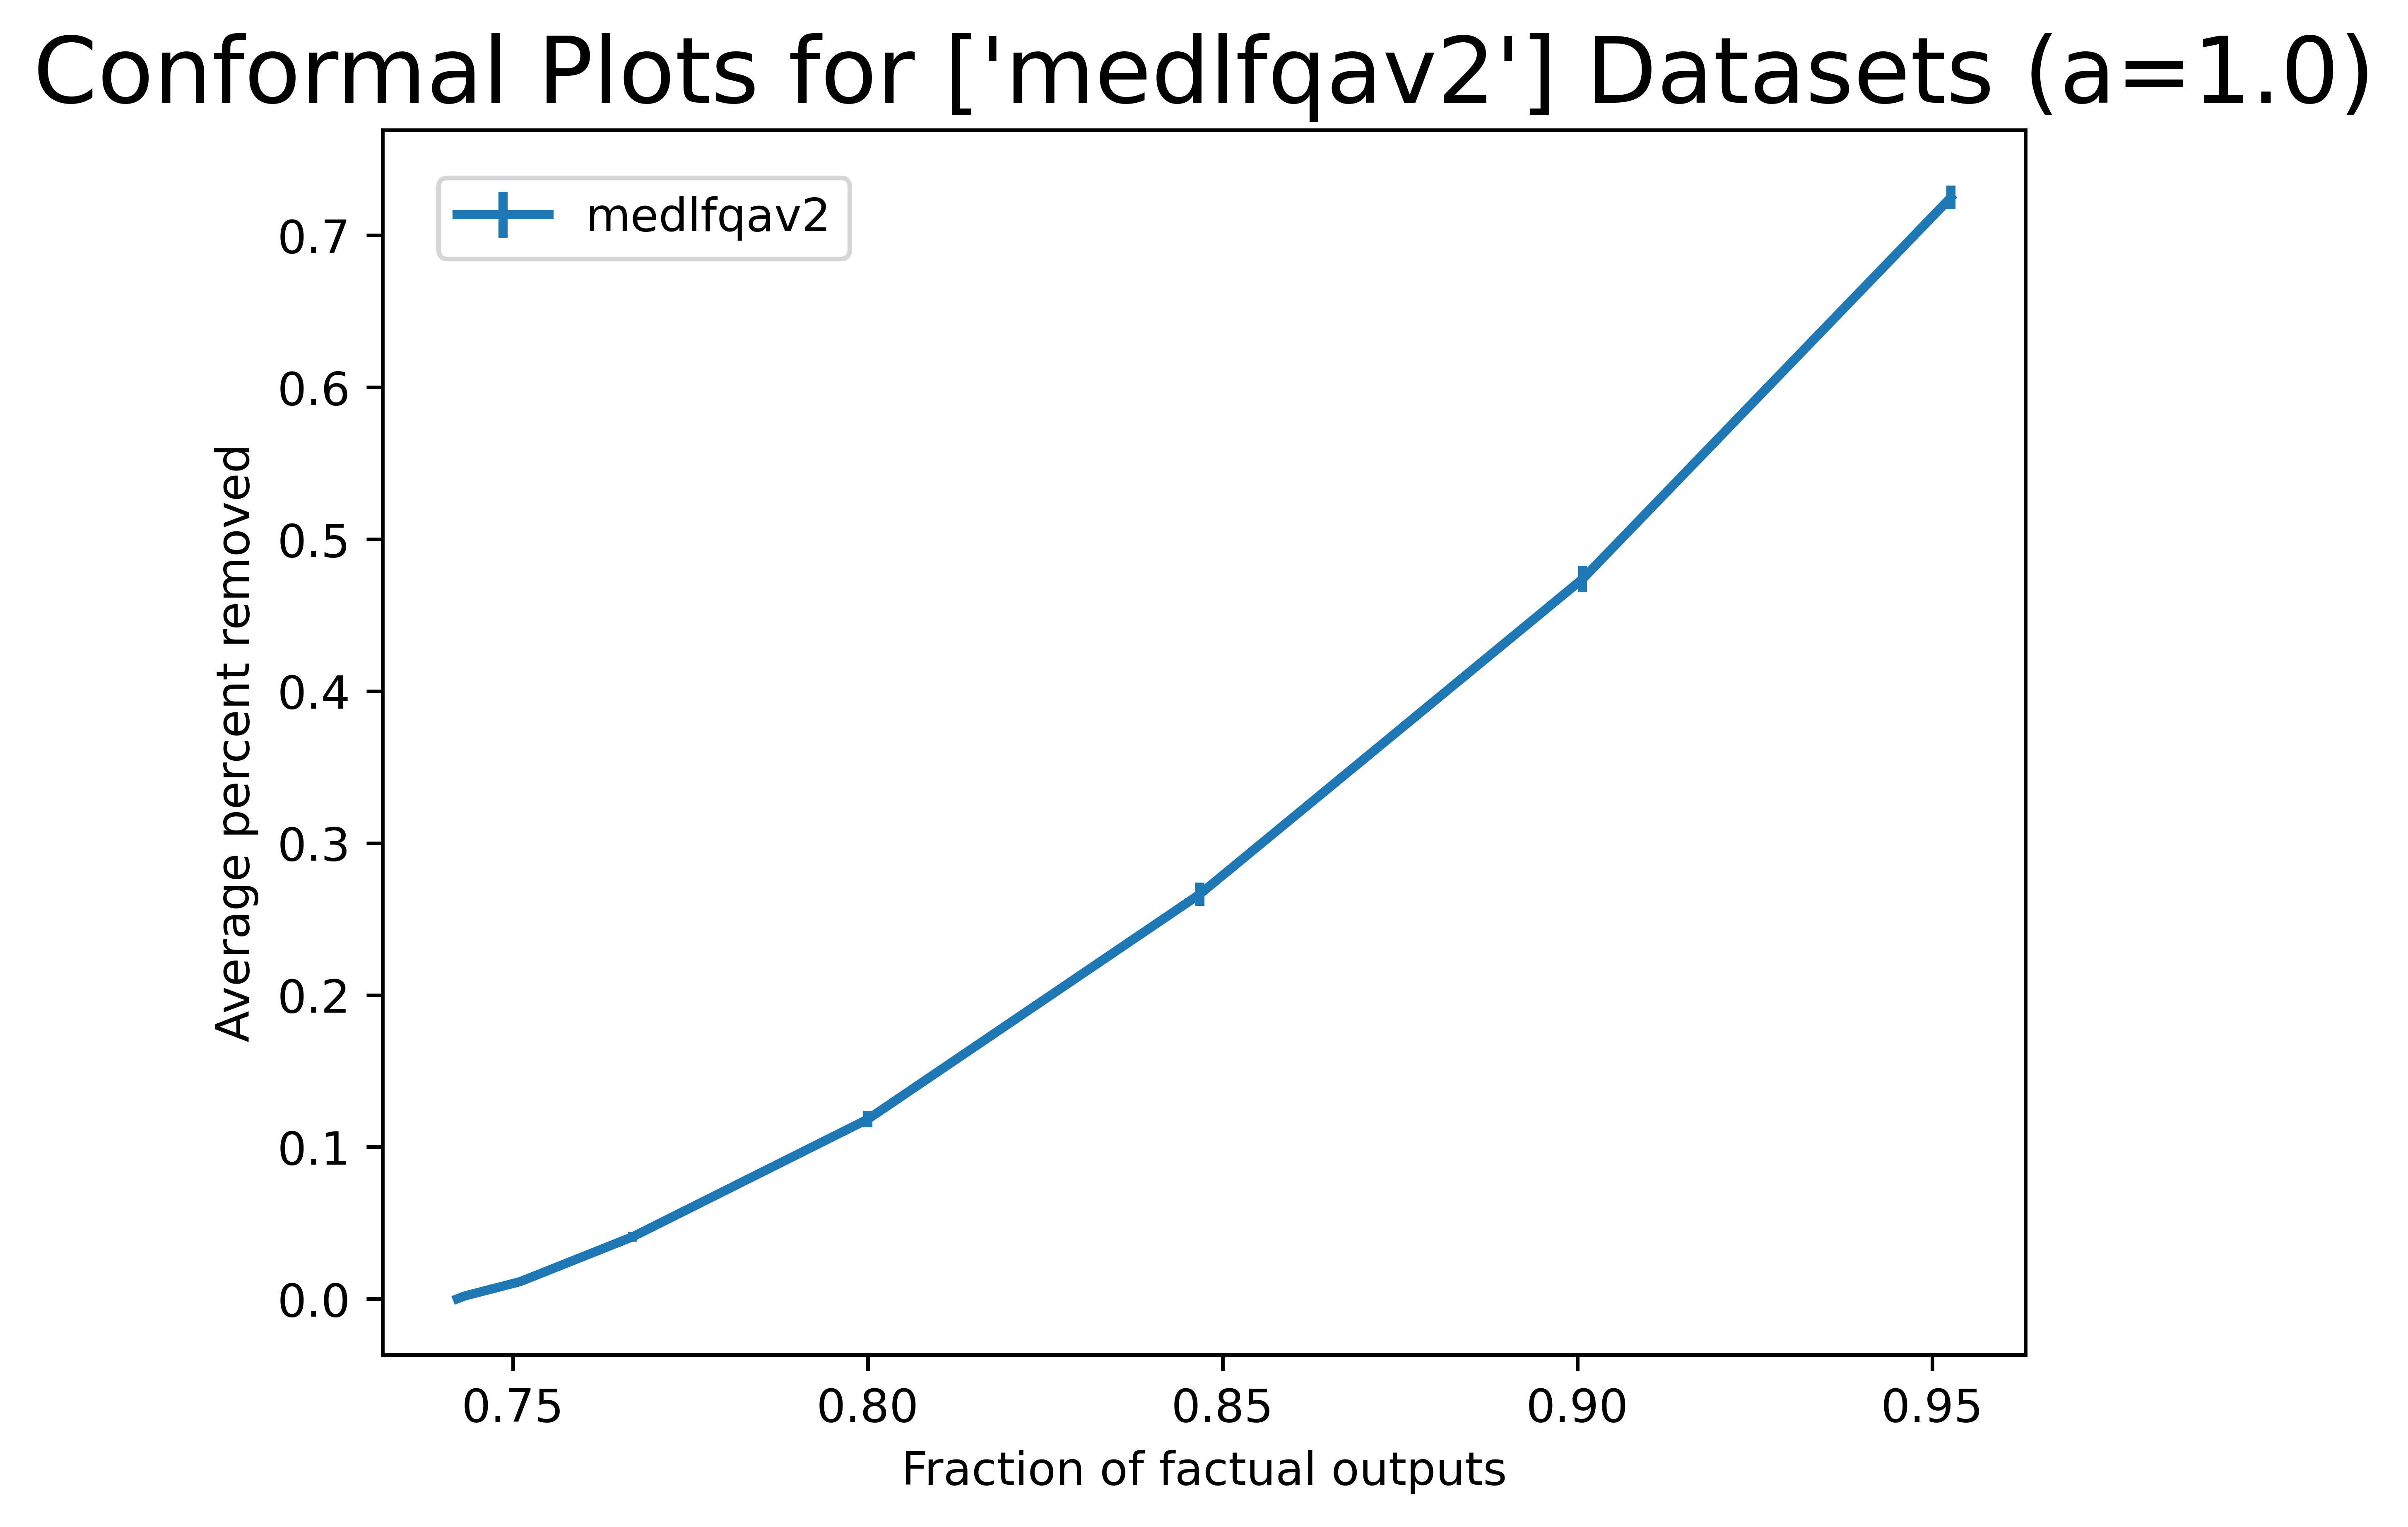

In [7]:

a=1.0
dataset_prefixs = ['medlfqav2'] #option: medication_qa, healthsearch_qa, kqa_golden, kqa_silver_wogold, live_qa， medlfqav2
method = 'similarity'
alphas = np.arange(0.05, 0.45, 0.05)
datasets = {}
for dataset_prefix in dataset_prefixs:
    data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
    datasets[dataset_prefix] = data

dsprefixs = "_".join(dataset_prefixs)
fig_filename = f"data/out/{dsprefixs}_{method}_a={a:.2f}_weighted_removal_fig.png"
csv_filename = f"data/out/{dsprefixs}_{method}_a={a:.2f}_weighted_removal.csv"
distance_conditional.calibrate_removal(
    dataset_prefixs, method, datasets, alphas, a, fig_filename, csv_filename
)

Producing calibration plot: data/out/medlfqav2_similarity_a=1.00_calibration_weighted_conditional_fig.png


100%|██████████| 8/8 [9:35:06<00:00, 4313.34s/it]  


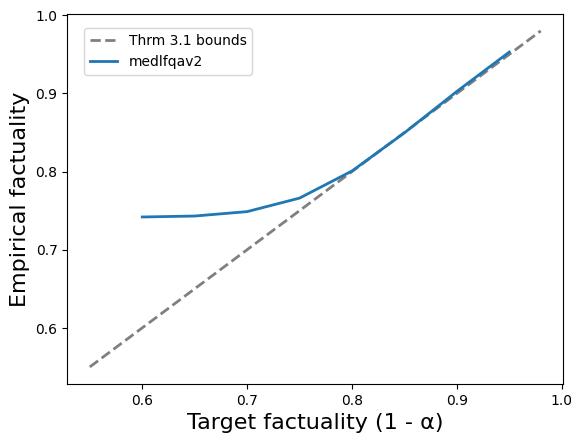

In [6]:

a=1.0
alphas = np.arange(0.05, 0.45, 0.05)
dataset_prefix = 'medlfqav2'
confidence_method = 'similarity'
data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
fig_filename = f"data/out/{dataset_prefix}_{confidence_method}_a={a:.2f}_calibration_weighted_conditional_fig.png"
csv_filename = f"data/out/{dataset_prefix}_{confidence_method}_a={a:.2f}_calibration_weighted_conditional.csv"
distance_conditional.calibrate_factual(
    dataset_prefix, confidence_method, data, alphas, a, fig_filename, csv_filename
)

# Local conformal VS Group Split Conformal
randomly draw certain amount of data from test data


In [3]:
from calibration import ConformalCalibration, WeightedConformalCalibration
import numpy as np
from calibration import load_calibration

conformal_prediction = ConformalCalibration()
weighted_conditional = WeightedConformalCalibration()

In [9]:
from tqdm import tqdm

a=1.0
alphas = np.arange(0.05, 0.45, 0.05)
dataset_prefix = 'kqa_silver_wogold'
confidence_method = 'similarity'
for alpha in alphas:
    data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
    fig_filename = f"data/out/partial/conformal/{dataset_prefix}/{confidence_method}_a={a:.2f}_alpha={alpha:.2f}_calibration_partial_factual_fig.png"
    csv_filename = f"data/out/partial/conformal/{dataset_prefix}/{confidence_method}_a={a:.2f}_alpha={alpha:.2f}_calibration_partial_factual.csv"
    conformal_prediction.calibrate_partial_factual(
        dataset_prefix, confidence_method, data, alpha, a, fig_filename, csv_filename, 200
    )

NameError: name 'conformal_prediction' is not defined

  0%|          | 0/8 [03:04<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/naihefeng/Documents/2025/study/layer6/rag_conformal_pred/conditional/data/out/partial/weighted/kqa_silver_wogold/similarity_a=1.00_alpha=0.05_calibration_partial_factual_fig.png'

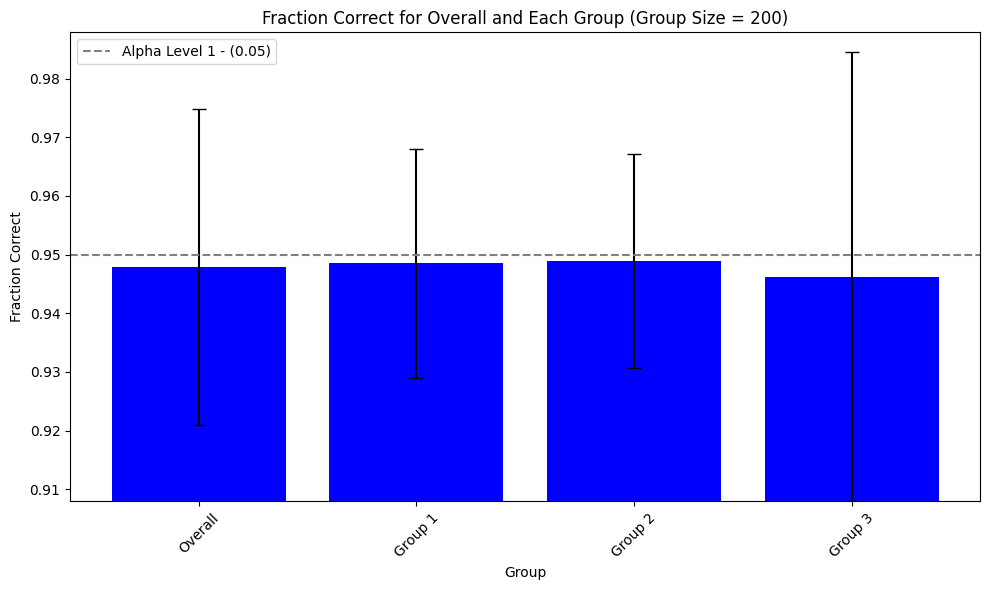

In [8]:
from tqdm import tqdm

a=1.0
alphas = np.arange(0.05, 0.45, 0.05)
dataset_prefix = 'kqa_silver_wogold'
confidence_method = 'similarity'
for alpha in tqdm(alphas):
    data = load_calibration(f"data/out/{dataset_prefix}_subclaims_with_scores.jsonl")
    fig_filename = f"data/out/partial/weighted/{dataset_prefix}/{confidence_method}_a={a:.2f}_alpha={alpha:.2f}_calibration_partial_factual_fig.png"
    csv_filename = f"data/out/partial/weighted/{dataset_prefix}/{confidence_method}_a={a:.2f}_alpha={alpha:.2f}_calibration_partial_factual.csv"
    weighted_conditional.calibrate_partial_factual(
        dataset_prefix, confidence_method, data, alpha, a, fig_filename, csv_filename, 200
    )